# ASSIGNMENT 3: DETECTION OF SPAM MAILS

In this assignment, it is asked to implement naive bayes algorithm from the scratch and to apply this algorithm for given ham/spam email dataset. Our aim is to predict whether an e-mail is a spam or not using the naive bayes model. This report shows steps we have followed, code implementations and analysis of results for naive bayes algorithm.

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem. The Naive Bayes algorithm is quick and simple to implement, but the necessity that predictors be independent is its major drawback.

## PART 1: Understanding the Data

Machine learning algorithms classify data using statistical models. In the instance of spam detection, a trained machine learning model must be able to tell if the sequence of words in an email is more similar to spam emails or not. Different machine learning methods can detect spam, in this assignment we use Naive Bayes. The "Bayes' theorem," which describes the likelihood of an event dependent on prior knowledge, is the foundation of nave Bayes. The problem is that our characteristics aren't always self-contained. 

Consider the words "not" and "interesting", in this situation, depending on where they appear in the message, the meaning can be radically different. Despite the fact that feature independence in text data is difficult to achieve, the Naive Bayes classifier has proven to be effective in natural language processing applications when correctly configured. In the following sections, it is going to be tested and interpreted whether Naive Bayes is succesful on email spam detection.

Naive Bayes, like other machine learning algorithms, does not understand linguistic context and instead relies on statistical relationships between words to determine whether a piece of text belongs to a specific class. This means that a naive Bayes spam detector, for example, can be fooled into missing a spam email if the sender simply adds some non-spam words at the end of the message or replaces spammy terms with closely related words.

On the other hand, many spam e-mails contain a large amount of "spammy" terms such as "free," "money," "product," and so on. This knowledge may aid us in making better decisions when it comes to the design of the spam detection system.

Therefore, detecting e-mails by analizing its words is a feasible approach to solve this problem. Generally, manipulative, needy, cheap, shady and fat-fetched words such as "exclusive deal", "free, "limited time", "offer expires", "urgent", "best price", "bargain", "great offer", "money" are well-known as spammy. On the other hand, classifying e-mails based on only words can be problematic due to the deficit of context interpretation.

In [6]:
import pandas as pd
import numpy as np
import string
import math
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [7]:
data = pd.read_csv("emails.csv")
data.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [8]:
print("Shape:",data.shape)

Shape: (5728, 2)


In [9]:
data["spam"].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<AxesSubplot:xlabel='spam', ylabel='count'>

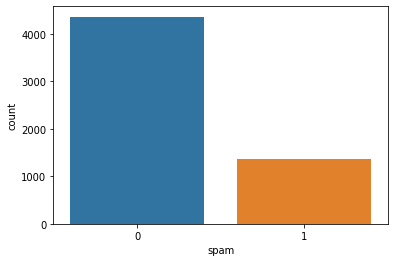

In [12]:
import seaborn as sns
sns.countplot(x="spam", data = data)

As can be seen above, the given data has two columns which are "text" and "spam". Spam=1 means that this e-mail is actually spam. Thus, our data has 4360 ham and 1368 spam mails which makes total 5728 e-mail. It can be seen that there is an imbalance on the number of ham and spam e-mails in given data.

In order to be able to interpret the data, it is needed to compute the frequencies of words and create a dictionary which holds unique words in the given data with their frequencies. After reading the data file and storing it into a pandas dataframe, the data is splitted into train and test with shuffling.

In [43]:
def get_frequencies(vectorizer, xtrain, ytrain):
    y = vectorizer.fit_transform(xtrain)
    doc_array = y.toarray()

    frequency_matrix = pd.DataFrame(data=doc_array, columns=vectorizer.get_feature_names_out())

    words = list(frequency_matrix.columns.values)
    freq = {}

    for i, j in frequency_matrix.iterrows():
        create_dictionary(freq, words, j.tolist(), ytrain[i])
    return freq, frequency_matrix


In this function, the vectorizer is supplied with the training data and frequency matrix is created. After that each row in frequency matrix is sent to "create_dictionary" function to calculate frequencies.

In [19]:
def create_dictionary(freq, words, row, is_spam):
    i = 0
    for item in row:
        if item != 0:
            if words[i] in freq:
                arr = freq[words[i]]
                arr[is_spam] += 1
                freq[words[i]] = arr

            else:
                arr = [0, 0]
                arr[is_spam] = 1
                freq[words[i]] = arr
        i += 1
    return freq


This function returns a dictioanry which includes each unique word as key and its frequencies on spam and ham mails as a list in the value. For instance, 'subject', [3498, 1084] means that the word "subject" is mentioned in 3498 ham mails and 1084 spam mails.

In [54]:
def get_frequencies_unigram(xtrain, ytrain, min_df, max_df):
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), token_pattern=r'\b[a-zA-Z]\w+\b',
                                 lowercase=True, min_df=min_df, max_df=max_df)
    return get_frequencies(vectorizer, xtrain, ytrain)

In [55]:
def get_frequencies_unigram_without_stopwords(xtrain, ytrain, min_df, max_df):
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), token_pattern=r'\b[a-zA-Z]\w+\b',
                                 lowercase=True, stop_words=ENGLISH_STOP_WORDS, min_df=min_df, max_df=max_df)
    return get_frequencies(vectorizer, xtrain, ytrain)


In [59]:
def get_frequencies_bigram(xtrain, ytrain, min_df, max_df):
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2), token_pattern=r'\b[a-zA-Z]\w+\b',
                                 lowercase=True, min_df=min_df, max_df=max_df)
    return get_frequencies(vectorizer, xtrain, ytrain)


In [60]:
def get_frequencies_bigram_without_stopwords(xtrain, ytrain, min_df, max_df):
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2), token_pattern=r'\b[a-zA-Z]\w+\b',
                                 lowercase=True, stop_words=ENGLISH_STOP_WORDS, min_df=min_df, max_df=max_df)
    return get_frequencies(vectorizer, xtrain, ytrain)

In [62]:
def get_frequencies_unigram_bigram(xtrain, ytrain):
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2), token_pattern=r'\b[a-zA-Z]\w+\b', lowercase=True)
    return get_frequencies(vectorizer, xtrain, ytrain)

The functions above create different vectorizers according to whether words are tokenized as unigram or bigrams.

In [34]:
import operator
df = pd.read_csv('emails.csv')
x = df.text.values
y = df.spam.values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, shuffle=True)

In [56]:
unigram_freq, freq_matrix = get_frequencies_unigram(xtrain, ytrain, 1, 1.0)
sorted_unigram = sorted(unigram_freq.items(), key=operator.itemgetter(1), reverse=True)
unigram_freq_no_stopwords, freq_matrix_no_stopwords = get_frequencies_unigram_without_stopwords(xtrain, ytrain, 1, 1.0)
sorted_unigram_no_stopwords = sorted(unigram_freq_no_stopwords.items(), key=operator.itemgetter(1), reverse=True)

print("--------------------------UNIGRAM MOST FREQUENT WORDS----------------------------")
print(list(sorted_unigram)[:3])
print("-----------------UNIGRAM (WITHOUT STOPWORDS) MOST FREQUENT WORDS-----------------")
print(list(sorted_unigram_no_stopwords)[:3])

--------------------------UNIGRAM MOST FREQUENT WORDS----------------------------
[('subject', [3498, 1084]), ('to', [3257, 920]), ('the', [3212, 853])]
-----------------UNIGRAM (WITHOUT STOPWORDS) MOST FREQUENT WORDS-----------------
[('subject', [3498, 1084]), ('vince', [2234, 1]), ('enron', [2062, 0])]


It can be seen that the word "subject" is the most frequent word in both ham and spam mails but it does not help our algorithm to classify better since it is not rare and cannot distinguish spam e-mails from ham e-mails. When we include stopwords, "to" and "the" are the next most frequent words in both spam and ham e-mails. However, they don't contribute any useful information neither, since they are frequently written in both ham and spam e-mails. On the other hand, when stopwords are removed, the most frequent words (in ham e-mails) after "subject" are "vince" and "enron". 

In [57]:
freq_matrix.head(10)

,aa,aaa,aaaenerfax,aadedeji,aagrawal,aal,aaldous,aaliyah,aall,aanalysis,...,zwrocic,zwwyw,zwzm,zxghlajf,zyc,zygoma,zymg,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
freq_matrix_no_stopwords.head(10)

,aa,aaa,aaaenerfax,aadedeji,aagrawal,aal,aaldous,aaliyah,aall,aanalysis,...,zwrocic,zwwyw,zwzm,zxghlajf,zyc,zygoma,zymg,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The frequency matrices for unigram are shown above. The first matrix has 30259 columns which means there are 30259 unique words, each row shows the frequencies of each word on that particular e-mail. For instance, in the first e-mail of our data, the word "aa" is not typed because its value is 0.

## PART 2: Implementing Naive Bayes

In [67]:
def naive_bayes(ham_count, spam_count, freq, xtest, ngram):
    y_pred = []
    for test in xtest:
        p_spam = math.log2(spam_count / (spam_count + ham_count))
        p_ham = math.log2(ham_count / (spam_count + ham_count))

        # probability for spam
        p_spam += calculate_probability(test, freq, spam_count, 1, ngram)

        # probability for spam
        p_ham += calculate_probability(test, freq, ham_count, 0, ngram)

        if p_spam > p_ham:
            y_pred.append(1)
        else:
            y_pred.append(0)

    return y_pred


In this function, the probability of being spam or ham are calculated respectively. Then, e-mail is labeled as spam if the probability calculated for spam is greater than probability calculated for ham, vice versa. One thing important here to state that the probabilities are calculated with loagirthm function in order to prevent numerical underflow when calculating multiplicative probabilities. The probabilities are substitued into logarithm function, then they are summed up.

In [69]:
def calculate_probability(test, freq, class_count, is_spam, ngram):
    prob = 0
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(ngram, ngram))
    y = vectorizer.fit_transform([test])
    test = vectorizer.get_feature_names_out()

    for word in test:
        if word in freq:
            prob += laplace_smoothing(freq[word][is_spam], 1, class_count, len(freq))

        else:
            prob += laplace_smoothing(0, 1, class_count, len(freq))
    return prob


This function calls laplace smoothing for each word in test sample, sums results up, returns the total probability.

In [65]:
def laplace_smoothing(freq, alpha, class_count, total_count):
    return math.log2((freq + alpha) / (class_count + total_count))


When calculating the probabilites, we may encounter some words that we havent during training. In this case, the frequency of that word would be 0, which dominates the result of our probability. This problem can be eliminated by using Laplace Smoothing also known as Add One Smoothing when alpha is 1. In this technique, we add 1 to the numerator, and we add k to the denominator. So, in the case that we don’t have a particular ingredient in our training set, the posterior probability comes out to 1 / N + k instead of zero. Plugging in this value into the product does not destroy our ability to make a prediction in the same way that plugging in a zero does.

In [64]:
def classification_report(ytest, ypred):
    tp = tn = fp = fn = 0
    for i in range(len(ytest)):
        if ytest[i] == ypred[i]:
            if ytest[i] == 1:
                tp += 1
            else:
                tn += 1
        else:
            if ypred[i] == 1:
                fp += 1
            else:
                fn += 1

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("accuracy  : " + str(accuracy))
    print("precision : " + str(precision))
    print("recall    : " + str(recall))
    print("f1_score  : " + str(f1_score))

In this function, predicted classification and actual classification are compared. Accuracy, recall, precision and f1 score are calculated by computing confusion matrix values like FN, FP, TP and TN. 

## PART 3: Analysis

When you train your machine learning model on the training data set, each term is assigned a weight based on how many times it appears in spam and ham emails. For example, if "win big money prize" is one of your features and only appears in spam emails, it will be assigned a higher probability of being spam. If "important meeting" is only mentioned in ham emails, then including it in an email increases the likelihood of that email being classified as not spam.

### Preprocessing

Before supplying our data to CountVectorizer it is required to preprocess the data. First of all, lowering the case of e-mails is essential since the words "HELLO" and "hello" are the same and lowering them is very helpful for reducing the dimensions by shrinking the size of the dictionary. Whitespaces are removed since they do not have any impact on our classifier. Lastly, numbers are discarded since they do not provide any difference to make our algorithm works more accurately.

### Stopwords

The definition of a stop word varies. A stop word is a word that appears frequently in a corpus. Or, given a context, you can consider any word that is devoid of true meaning. Articles and some verbs are commonly regarded as stop words because they do not assist us in determining the context or true meaning of a sentence. These are words that can be removed without affecting the final model that you are training. However, the removal of stopwords is not necessary in all situations.

Stopwords should be removed if they add no new information to your problem. They are usually unnecessary in classification problems because it is possible to discuss the general idea of a text even if stop words are removed. Thus, we remove the low-level information from our text by removing these words, allowing us to focus on the important information. In other words, the removal of such words has no negative consequences for the model we train for our task.

Removal of stop words definitely reduces the dataset size and thus reduces the training time due to the fewer number of tokens involved in the training.

In e-mail classification, the occurence of stopwords are not essential because the context of the mail, whether it is spam or ham, can be inferred from the other words. Furthermore, removal of stopwords shrinks the data and improves the performance of our algorithm.

### Tokenizing - Unigram, Bigram

Text data must be "tokenized" before being fed to machine learning algorithms, both for training and for making predictions on new data. Tokenization is the process of dividing text data into smaller pieces. If you divide the preceding data set into single words (also known as unigrams), you'll get the following vocabulary. It's worth noting that I only used each word once. If we use occurence of a single word, it is called unigram. On the other hand, if we use the occurence of two adjacent words, it is called bigram.

In [ ]:
max_df min_df açıkla

## PART 3: Calculation of Performance Metrics

In [70]:
def main():
    df = pd.read_csv('emails.csv')

    x = df.text.values
    y = df.spam.values

    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, shuffle=True)

    ham_count = np.count_nonzero(ytrain == 0)
    spam_count = np.count_nonzero(ytrain == 1)

    print("--------------------------UNIGRAM DEFAULT PARAM----------------------------")
    freq = get_frequencies_unigram(xtrain, ytrain, 1, 1.0)
    ypred = naive_bayes(ham_count, spam_count, freq, xtest, 1)
    classification_report(ytest, ypred)

    print("\n-------------------UNIGRAM min_df = 0.01, max_df = 0.8-------------------")
    freq = get_frequencies_unigram(xtrain, ytrain, 0.01, 0.8)
    ypred = naive_bayes(ham_count, spam_count, freq, xtest, 1)
    classification_report(ytest, ypred)

    print("\n----------UNIGRAM WITHOUT STOPWORDS min_df = 0.01, max_df = 0.8----------")
    freq = get_frequencies_unigram_without_stopwords(xtrain, ytrain, 0.01, 0.8)
    ypred = naive_bayes(ham_count, spam_count, freq, xtest, 1)
    classification_report(ytest, ypred)

    print("\n--------------------------BIGRAM DEFAULT PARAM---------------------------")
    freq = get_frequencies_bigram(xtrain, ytrain, 1, 1.0)
    ypred = naive_bayes(ham_count, spam_count, freq, xtest, 2)
    classification_report(ytest, ypred)

    print("\n--------------------BIGRAM min_df = 0.01, max_df = 0.8--------------------")
    freq = get_frequencies_bigram(xtrain, ytrain, 0.01, 0.8)
    ypred = naive_bayes(ham_count, spam_count, freq, xtest, 2)
    classification_report(ytest, ypred)

    print("\n----------BIGRAM WITHOUT STOPWORDS min_df = 0.01, max_df = 0.8-----------")
    freq = get_frequencies_bigram_without_stopwords(xtrain, ytrain, 0.01, 0.8)
    ypred = naive_bayes(ham_count, spam_count, freq, xtest, 2)
    classification_report(ytest, ypred)

main()

--------------------------UNIGRAM DEFAULT PARAM----------------------------


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In the main function, after reading the e-mails data, train and test data are created. Then, frequencies are calculated with different parameters like unigram, bigram, max_df and min_df. Naive Bayes algorithm is revoked by substituting in the frequencies calculated beforehand. Finally, classification report which includes such as accuracy, recall, precision and f1 score is obtained. The results are shown above.

When evaluating the performance of a data science model, accuracy is not always the best indicator.
Some real-world problems may have a very imbalanced class, and using accuracy may not provide us with enough confidence to understand the algorithm's performance.
Spam data accounts for approximately 20% of our data in the email spamming problem that we are attempting to solve. If our algorithm correctly classifies all emails as non-spam, it will achieve an accuracy of 80%.